In [74]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

In [75]:
df = pd.read_csv('violent_crime.csv')

In [76]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [77]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,06/14/2021 10:32:00 PM,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142)
20032,JE289151,07/03/2021 11:49:00 PM,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858)
20033,JE290206,07/04/2021 10:44:00 PM,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142)
20034,JE292814,07/06/2021 10:36:00 PM,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   20036 non-null  object 
 1   date                          20036 non-null  object 
 2   block                         20036 non-null  object 
 3   primary_type                  20036 non-null  object 
 4   unique_id                     20036 non-null  object 
 5   zip_code                      20036 non-null  int64  
 6   ward                          20036 non-null  int64  
 7   community_area                20036 non-null  object 
 8   street_outreach_organization  20036 non-null  object 
 9   area                          20036 non-null  int64  
 10  district                      20036 non-null  int64  
 11  beat                          20036 non-null  int64  
 12  age                           19801 non-null  object 
 13  s

In [79]:
df['age'].fillna('UNKNOWN', inplace=True)
df['sex'].fillna('UNKNOWN', inplace=True)
df['race'].fillna('(NOT PROVIDED)', inplace=True)

In [80]:
df['iucr_secondary'].replace(' -', ':', inplace=True, regex=True)
df['sex'].replace(['UNKNOWN','X', '(NOT PROVIDED)'], 'SEX_UNKNOWN', inplace=True)

In [81]:
df['sex'].unique()

array(['M', 'F', 'SEX_UNKNOWN'], dtype=object)

In [82]:
df['iucr_secondary'].value_counts()

AGGRAVATED: HANDGUN                           15415
FIRST DEGREE MURDER                            3599
ARMED: HANDGUN                                  376
ATTEMPT: ARMED-HANDGUN                          192
AGGRAVATED: OTHER FIREARM                       123
AGGRAVATED DOMESTIC BATTERY: HANDGUN             92
ATTEMPT ARMED: HANDGUN                           86
SECOND DEGREE MURDER                             38
AGGRAVATED VEHICULAR HIJACKING                   31
AGGRAVATED POLICE OFFICER: HANDGUN               21
AGGRAVATED PO: HANDGUN                           18
AGGRAVATED                                        8
INVESTIGATION                                     5
VEHICULAR HIJACKING                               4
ATTEMPT AGGRAVATED                                4
ARMED: OTHER FIREARM                              3
ATTEMPT: AGGRAVATED                               3
AGGRAVATED POLICE OFFICER: OTHER FIREARM          3
ATTEMPT ARMED: OTHER FIREARM                      3
ARMED: OTHER

In [83]:
def help_available(string):
    if string == 'None':
        return 'no'
    else:
        return 'yes'

In [11]:
df['so_yes_no'] = df['street_outreach_organization'].map(help_available)
df['so_yes_no']

0         no
1        yes
2        yes
3        yes
4        yes
        ... 
20031     no
20032    yes
20033    yes
20034     no
20035     no
Name: so_yes_no, Length: 20036, dtype: object

In [12]:
df['street_outreach_organization'].value_counts().head(40)

None                                                                     5100
READI 60644 | INVC Austin                                                1132
UCAN North Lawndale | READI 60623                                         875
TADC Englewood | READI 60621                                              864
ALSO Humboldt Park                                                        825
READI 60624 | INVC West Garfield Park                                     808
TADC West Englewood | READI 60631                                         683
INVC Austin                                                               589
Claretian Associates South Shore                                          515
SWOP Chicago Lawn                                                         467
PBMR New City                                                             461
Acclivus Greater Grand Crossing                                           433
READI 60623 | New Life Centers South Lawndale | Enlace South Law

In [13]:
df['so_yes_no'].value_counts()

yes    14936
no      5100
Name: so_yes_no, dtype: int64

In [14]:
df['sex'].value_counts()

M              17261
F               2530
SEX_UNKNOWN      245
Name: sex, dtype: int64

In [15]:
df['age'].unique()

array(['20 - 29', '30 - 39', '0 - 19', '70 - 79', '40 - 49', '50 - 59',
       '60 - 69', '80+', 'UNKNOWN'], dtype=object)

In [16]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('D')

In [17]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no
0,HZ100096,2016-01-01,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),no
1,HZ100342,2016-01-01,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),yes
2,HZ101042,2016-01-01,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),yes
3,HZ101842,2016-01-02,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),yes
4,HZ103309,2016-01-04,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),no
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),yes
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),yes
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),no


In [18]:
df_dow = df.groupby('day_of_week').count()
df_dow

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,hour,latitude,longitude,location,so_yes_no
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,
1,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923
2,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
3,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
4,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
5,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
6,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
7,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742


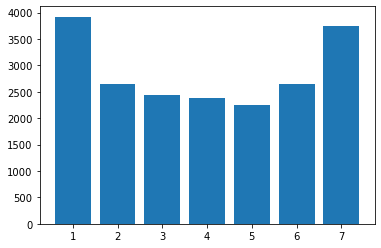

In [19]:
plt.bar(df_dow.index, df_dow['unique_id']);
# 1 Sun, 2 Mon etc

In [20]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_race = df[['race']]
ohe.fit(cat_race)

# ohe.transform(cat_age).shape
race_encoded = pd.DataFrame(ohe.transform(cat_race).astype(int), columns=ohe.categories_[0])
race_encoded

,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
20031,0,0,1,0,0,0,0,0
20032,0,0,1,0,0,0,0,0
20033,0,0,1,0,0,0,0,0
20034,0,0,1,0,0,0,0,0


In [21]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_age = df[['age']]
ohe.fit(cat_age)

# ohe.transform(cat_age).shape
age_encoded = pd.DataFrame(ohe.transform(cat_age).astype(int), columns=ohe.categories_[0])
age_encoded

,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN
0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
20031,0,1,0,0,0,0,0,0,0
20032,0,0,0,1,0,0,0,0,0
20033,0,0,0,1,0,0,0,0,0
20034,1,0,0,0,0,0,0,0,0


In [22]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

cat_sex = df[['sex']]
ohe.fit(cat_sex)

# ohe.transform(cat_age).shape
sex_encoded = pd.DataFrame(ohe.transform(cat_sex).astype(int), columns=ohe.categories_[0])
sex_encoded

,F,M,SEX_UNKNOWN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
20031,0,1,0
20032,0,1,0
20033,0,1,0
20034,0,1,0


In [23]:
df = pd.concat([df, age_encoded, race_encoded, sex_encoded], axis=1)
df.tail()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
20031,JE266314,2021-06-14,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20032,JE289151,2021-07-03,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),yes,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20033,JE290206,2021-07-04,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),yes,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20034,JE292814,2021-07-06,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
20035,JE277577,2021-06-24,2000 W 52ND ST,FATAL SHOOTING,HOM-JE277577-1,60609,16,NEW CITY,None,1,9,932,40 - 49,M,WWH,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,6,5,3,41.798852,-87.676535,POINT (-87.67653534612 41.798851654142),no,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [24]:
grouplist = [ 'date']

In [25]:
df_cases = df.groupby(grouplist, as_index=False).sum()

In [26]:
df_cases.rename(columns={'unique_id' : 'victim_count'})

,date,zip_code,ward,area,district,beat,month,day_of_week,hour,latitude,longitude,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
0,2016-01-01,1091286,283,36,167,17075,18,108,120,752.350287,-1577.764800,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0
1,2016-01-02,545728,209,29,100,10213,9,63,87,376.500046,-789.288924,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0
2,2016-01-03,727522,290,33,133,13586,12,12,77,502.281165,-1052.044919,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0
3,2016-01-04,363763,172,21,85,8669,6,12,92,251.120326,-526.252356,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0
4,2016-01-05,788118,217,32,116,11851,13,39,199,543.657052,-1139.761822,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2021-07-09,727460,248,27,99,10152,84,72,175,501.478864,-1051.766476,0,6,2,1,2,0,0,0,1,0,0,8,0,0,1,1,2,0,12,0
2012,2021-07-10,1576218,498,73,231,23691,182,182,320,1087.099022,-2279.510387,0,7,16,2,0,1,0,0,0,0,0,22,0,0,0,0,4,3,23,0
2013,2021-07-11,666851,136,24,66,6870,77,11,145,459.749293,-963.793031,0,5,3,2,1,0,0,0,0,0,0,8,0,0,0,0,3,0,11,0
2014,2021-07-12,606249,187,26,107,10922,70,20,128,418.001436,-876.618385,2,4,2,1,0,0,0,0,1,0,0,9,0,0,0,0,1,3,7,0


In [27]:
df_cases = df_cases[df_cases['date'] < '2020-01-01']
all_sex = ['M', 'F', 'SEX_UNKNOWN']
df_cases['total'] = df_cases[all_sex].sum(axis=1)
df_cases.head()

,date,zip_code,ward,area,district,beat,month,day_of_week,hour,latitude,longitude,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
0,2016-01-01,1091286,283,36,167,17075,18,108,120,752.350287,-1577.764800,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,18
1,2016-01-02,545728,209,29,100,10213,9,63,87,376.500046,-789.288924,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,9
2,2016-01-03,727522,290,33,133,13586,12,12,77,502.281165,-1052.044919,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,12
3,2016-01-04,363763,172,21,85,8669,6,12,92,251.120326,-526.252356,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,6
4,2016-01-05,788118,217,32,116,11851,13,39,199,543.657052,-1139.761822,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,13


In [28]:
drop_list = ['zip_code', 'ward', 'district', 'beat', 'month', \
         'day_of_week', 'hour', 'latitude', 'longitude', 'area']

df_cases.drop(drop_list, axis=1, inplace=True)

In [29]:
df_cases

,date,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
0,2016-01-01,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,18
1,2016-01-02,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,9
2,2016-01-03,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,12
3,2016-01-04,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,6
4,2016-01-05,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2019-12-27,3,4,2,1,1,0,0,0,0,0,0,9,0,0,1,1,0,4,7,0,11
1454,2019-12-28,1,5,0,1,1,1,1,0,0,0,0,10,0,0,0,0,0,5,5,0,10
1455,2019-12-29,0,5,1,2,0,0,0,0,0,0,0,3,0,0,0,0,5,0,8,0,8
1456,2019-12-30,1,3,1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0,5


In [30]:
df_fsm = df_cases[['date', 'total']]
df_fsm.set_index('date', inplace=True)
df_fsm.head()

,total
date,
2016-01-01,18
2016-01-02,9
2016-01-03,12
2016-01-04,6
2016-01-05,13


In [31]:
df_fsm_roll_count = df_fsm['total'].rolling(min_periods=1, window=7).sum()
df_fsm = pd.concat([df_fsm_roll_count, df_fsm], axis=1)
df_fsm

,total,total
date,,
2016-01-01,18.0,18
2016-01-02,27.0,9
2016-01-03,39.0,12
2016-01-04,45.0,6
2016-01-05,58.0,13
...,...,...
2019-12-27,73.0,11
2019-12-28,69.0,10
2019-12-29,55.0,8


In [32]:
df_fsm.columns=['recent', 'total']

In [33]:
df_fsm

,recent,total
date,,
2016-01-01,18.0,18
2016-01-02,27.0,9
2016-01-03,39.0,12
2016-01-04,45.0,6
2016-01-05,58.0,13
...,...,...
2019-12-27,73.0,11
2019-12-28,69.0,10
2019-12-29,55.0,8


In [34]:
df_fsm[7:]

,recent,total
date,,
2016-01-08,79.0,18
2016-01-09,81.0,11
2016-01-10,81.0,12
2016-01-11,81.0,6
2016-01-12,79.0,11
...,...,...
2019-12-27,73.0,11
2019-12-28,69.0,10
2019-12-29,55.0,8


<AxesSubplot:xlabel='date'>

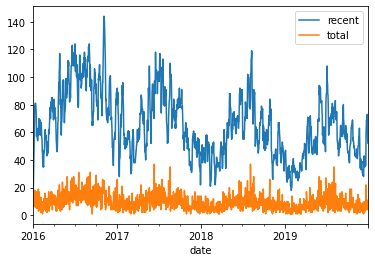

In [35]:
df_fsm.plot()

In [36]:
first_simple_model = LinearRegression()

X = df_fsm.drop('total', axis=1)
y = df_fsm['total']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

first_simple_model.fit(X_train, y_train)

LinearRegression()

In [38]:
first_simple_model.score(X_train, y_train)

0.34874478593980773

In [39]:
first_simple_model.score(X_test, y_test)

0.33570724104877825

In [40]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     623.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          1.59e-110
Time:                        18:13:13   Log-Likelihood:                -3392.8
No. Observations:                1166   AIC:                             6790.
Df Residuals:                    1164   BIC:                             6800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.393      0.208      0.835      -0.690       0.853
recent         0.1414      0.006     24.966      0.000       0.130       0.152
==============================================================================
Omnibus:                      207.560   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.673
Skew:                           0.993   Prob(JB):                    3.40e-101
Kurtosis:                       5.362   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
df_cases.head()

,date,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
0,2016-01-01,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,18
1,2016-01-02,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,9
2,2016-01-03,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,12
3,2016-01-04,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,6
4,2016-01-05,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,13


In [42]:
target = df_cases[['date', 'total']]
target.set_index('date', inplace=True)

In [43]:
df_demos = df_cases.drop('total', axis=1)
df_demos

,date,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
0,2016-01-01,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0
1,2016-01-02,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0
2,2016-01-03,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0
3,2016-01-04,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0
4,2016-01-05,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2019-12-27,3,4,2,1,1,0,0,0,0,0,0,9,0,0,1,1,0,4,7,0
1454,2019-12-28,1,5,0,1,1,1,1,0,0,0,0,10,0,0,0,0,0,5,5,0
1455,2019-12-29,0,5,1,2,0,0,0,0,0,0,0,3,0,0,0,0,5,0,8,0
1456,2019-12-30,1,3,1,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,5,0


In [44]:
df_demos.set_index('date', inplace=True)


In [45]:
df_demos = df_demos.rolling(window=7).sum()

In [46]:
df_demos

,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
date,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,16.0,32.0,17.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,54.0,0.0,0.0,1.0,3.0,14.0,11.0,62.0,0.0
2019-12-28,15.0,29.0,15.0,5.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,54.0,0.0,0.0,1.0,2.0,11.0,14.0,55.0,0.0
2019-12-29,13.0,22.0,11.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1.0,2.0,12.0,11.0,44.0,0.0


In [47]:
df_demos = pd.concat([df_demos, target], axis=1)

In [48]:
df_demos = df_demos[7:]

In [49]:
df_demos.head()

,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,total
date,,,,,,,,,,,,,,,,,,,,,
2016-01-08,17.0,43.0,12.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0,0.0,0.0,3.0,15.0,7.0,72.0,0.0,18
2016-01-09,19.0,43.0,12.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,0.0,0.0,0.0,3.0,15.0,7.0,74.0,0.0,11
2016-01-10,21.0,44.0,8.0,3.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,63.0,0.0,0.0,0.0,3.0,13.0,7.0,73.0,1.0,12
2016-01-11,22.0,44.0,7.0,3.0,2.0,2.0,0.0,0.0,1.0,2.0,0.0,66.0,0.0,0.0,0.0,2.0,11.0,7.0,73.0,1.0,6
2016-01-12,20.0,41.0,11.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,0.0,66.0,0.0,0.0,0.0,2.0,9.0,6.0,72.0,1.0,11


In [50]:
demo_model = LinearRegression()

X_demos = df_demos.drop('total', axis =1)
y_demos = df_demos['total']

In [51]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_demos, y_demos, test_size=.2, random_state=42)

demo_model.fit(Xd_train, yd_train)

demo_model.score(Xd_train, yd_train)

0.3634385210732668

In [52]:
demo_model.score(Xd_test, yd_test)

0.3154846485480818

In [53]:
sm.OLS(yd_train, sm.add_constant(Xd_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     36.19
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.14e-98
Time:                        18:13:13   Log-Likelihood:                -3364.6
No. Observations:                1160   AIC:                             6767.
Df Residuals:                    1141   BIC:                             6863.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0053      0.430     -0.012      0.990      -0.849       0.839
0 - 19             0.1121      0.087      1.295      0.196      -0.058       0.282
20 - 29            0.1088      0.081      1.337      0.182      -0.051       0.268
30 - 39            0.0812      0.083      0.979      0.328      -0.081       0.244
40 - 49            0.0838      0.093      0.900      0.368      -0.099       0.267
50 - 59           -0.0029      0.116     -0.025      0.980      -0.231       0.226
60 - 69            0.2767      0.161      1.717      0.086      -0.040       0.593
70 - 79           -0.3947      0.292     -1.352      0.177      -0.968       0.178
80+               -0.2200      0.396     -0.556      0.578      -0.996       0.556
UNKNOWN            0.2423      0.282      0.858      0.391      -0.312       0.796
(NOT PROVIDED)    -0.2132      0.205     -1.038      0.300      -0.616       0.190
API               -0.2811      0.282     -0.996      0.319      -0.835       0.273
BLK                0.0258      0.174      0.148      0.882      -0.316       0.367
I                  0.5507      1.466      0.376      0.707      -2.326       3.428
U                 -0.0924      0.447     -0.207      0.836      -0.970       0.785
WBH                0.2735      0.258      1.060      0.289      -0.233       0.780
WHI                0.0060      0.187      0.032      0.974      -0.360       0.372
WWH                0.0181      0.176      0.103      0.918      -0.328       0.364
F                  0.0197      0.149      0.132      0.895      -0.273       0.313
M                  0.0186      0.148      0.125      0.900      -0.273       0.310
SEX_UNKNOWN        0.2490      0.299      0.833      0.405      -0.337       0.835
==============================================================================
Omnibus:                      182.800   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.760
Skew:                           0.926   Prob(JB):                     8.41e-81
Kurtosis:                       5.050   Cond. No.                     1.51e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.23e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
df.head()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN
0,HZ100096,2016-01-01,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,HZ100342,2016-01-01,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),yes,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,HZ101042,2016-01-01,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),yes,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,HZ101842,2016-01-02,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,HZ103309,2016-01-04,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),yes,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [55]:
df['primary_type'].replace(['NON-SHOOTING HOMICIDE', 'FATAL SHOOTING'], 'fatal', inplace=True)
df['primary_type'].replace(['NON-FATAL SHOOTING'], 'non_fatal', inplace=True)

In [56]:
df['primary_type'].value_counts(normalize=True)

non_fatal    0.81688
fatal        0.18312
Name: primary_type, dtype: float64

In [57]:
cats_list = ['primary_type', 'so_yes_no', 'month', 'day_of_week', 'hour']
df_cats = df[cats_list]

In [58]:
df_cats

,primary_type,so_yes_no,month,day_of_week,hour
0,fatal,no,1,6,2
1,fatal,yes,1,6,6
2,fatal,yes,1,6,22
3,fatal,yes,1,7,16
4,fatal,yes,1,2,8
...,...,...,...,...,...
20031,non_fatal,no,6,2,22
20032,non_fatal,yes,7,7,23
20033,non_fatal,yes,7,1,22
20034,fatal,no,7,3,22


In [59]:
df_cats = df_cats.astype(str)

In [60]:
df_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   primary_type  20036 non-null  object
 1   so_yes_no     20036 non-null  object
 2   month         20036 non-null  object
 3   day_of_week   20036 non-null  object
 4   hour          20036 non-null  object
dtypes: object(5)
memory usage: 782.8+ KB


In [61]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

df_fatal = df_cats[['primary_type']]

ohe.fit(df_fatal)

fatal_encoded = pd.DataFrame(ohe.transform(df_fatal).astype(int), columns=ohe.categories_[0])
fatal_encoded

,fatal,non_fatal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
20031,0,1
20032,0,1
20033,0,1
20034,1,0


In [62]:
ohe = OneHotEncoder(handle_unknown='error', sparse=False)

df_outreach = df_cats[['so_yes_no']]

ohe.fit(df_outreach)

outreach_encoded = pd.DataFrame(ohe.transform(df_outreach).astype(int), columns=ohe.categories_[0])
outreach_encoded

,no,yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
20031,1,0
20032,0,1
20033,0,1
20034,1,0


In [63]:
df_fatal_so = pd.concat([df, fatal_encoded, outreach_encoded], axis=1)

In [64]:
df_fatal_so

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,fatal,non_fatal,no,yes
0,HZ100096,2016-01-01,4600 S ST LAWRENCE,fatal,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,HZ100342,2016-01-01,1900 W GARFIELD BLVD,fatal,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),yes,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
2,HZ101042,2016-01-01,6100 S SANGAMON ST,fatal,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),yes,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
3,HZ101842,2016-01-02,6300 S STONY ISLAND,fatal,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
4,HZ103309,2016-01-04,400 N CENTRAL AVE,fatal,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),yes,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,2021-06-14,7300 S MOZART ST,non_fatal,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142),no,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
20032,JE289151,2021-07-03,1000 W 89TH ST,non_fatal,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858),yes,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
20033,JE290206,2021-07-04,3000 E 79TH PL,non_fatal,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED: HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142),yes,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
20034,JE292814,2021-07-06,12100 S DOTY AVE,fatal,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142),no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [65]:
df_fatal_so = df_fatal_so.groupby('date').sum()

In [66]:
all_sex = ['M', 'F', 'SEX_UNKNOWN']
df_fatal_so['total'] = df_fatal_so[all_sex].sum(axis=1)
df_fatal_so.head()

,zip_code,ward,area,district,beat,month,day_of_week,hour,latitude,longitude,0 - 19,20 - 29,30 - 39,40 - 49,50 - 59,60 - 69,70 - 79,80+,UNKNOWN,(NOT PROVIDED),API,BLK,I,U,WBH,WHI,WWH,F,M,SEX_UNKNOWN,fatal,non_fatal,no,yes,total
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1091286,283,36,167,17075,18,108,120,752.350287,-1577.764800,2,9,6,1,0,0,0,0,0,0,0,17,0,0,0,0,1,2,16,0,3,15,7,11,18
2016-01-02,545728,209,29,100,10213,9,63,87,376.500046,-789.288924,2,6,1,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,8,0,1,8,1,8,9
2016-01-03,727522,290,33,133,13586,12,12,77,502.281165,-1052.044919,2,4,5,1,0,0,0,0,0,0,0,8,0,0,0,0,4,0,12,0,0,12,4,8,12
2016-01-04,363763,172,21,85,8669,6,12,92,251.120326,-526.252356,0,3,2,0,1,0,0,0,0,0,0,2,0,0,0,1,3,0,6,0,2,4,2,4,6
2016-01-05,788118,217,32,116,11851,13,39,199,543.657052,-1139.761822,5,7,0,1,0,0,0,0,0,0,0,11,0,0,0,0,2,1,12,0,4,9,6,7,13


In [67]:
df_fatal_so = df_fatal_so[['fatal', 'non_fatal', 'no', 'yes', 'total']]

In [68]:
df_fatal_so.drop('total', axis=1,inplace=True)

In [69]:
df_fatal_so = df_fatal_so.rolling(min_periods=1, window=7).sum()
df_fatal_so = pd.concat([df_fatal_so, target], axis=1)
df_fatal_so = df_fatal_so[7:]
df_fatal_so = df_fatal_so.dropna()
df_fatal_so

,fatal,non_fatal,no,yes,total
date,,,,,
2016-01-08,13.0,66.0,21.0,58.0,18.0
2016-01-09,13.0,68.0,20.0,61.0,11.0
2016-01-10,13.0,68.0,17.0,64.0,12.0
2016-01-11,12.0,69.0,18.0,63.0,6.0
2016-01-12,8.0,71.0,15.0,64.0,11.0
...,...,...,...,...,...
2019-12-27,10.0,63.0,18.0,55.0,11.0
2019-12-28,7.0,62.0,14.0,55.0,10.0
2019-12-29,9.0,46.0,14.0,41.0,8.0


In [70]:
demo_fs_model = LinearRegression()

X_fso = df_fatal_so.drop('total', axis =1)
y_fso = df_fatal_so['total']

In [71]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fso, y_fso, test_size=.2, random_state=42)

demo_fs_model.fit(Xf_train, yf_train)

demo_fs_model.score(Xf_train, yf_train)

0.35602809037279937

In [72]:
demo_fs_model.score(Xf_test, yf_test)

0.33071728656129207

In [73]:
sm.OLS(yf_train, sm.add_constant(Xf_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     213.0
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          5.44e-110
Time:                        18:13:14   Log-Likelihood:                -3371.4
No. Observations:                1160   AIC:                             6751.
Df Residuals:                    1156   BIC:                             6771.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1587      0.403     -0.394      0.694      -0.949       0.632
fatal          0.0852      0.025      3.374      0.001       0.036       0.135
non_fatal      0.0674      0.013      5.135      0.000       0.042       0.093
no             0.0829      0.020      4.206      0.000       0.044       0.122
yes            0.0697      0.013      5.388      0.000       0.044       0.095
==============================================================================
Omnibus:                      192.597   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.425
Skew:                           0.952   Prob(JB):                     5.57e-89
Kurtosis:                       5.187   Cond. No.                     3.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.06e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""